# Task 3 - Modeling

This notebook will get you started by helping you to load the data, but then it'll be up to you to complete the task! If you need help, refer to the `modeling_walkthrough.ipynb` notebook.


## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We want to use dataframes once again to store and manipulate the data.

In [ ]:
!pip install pandas

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

## Section 2 - Data loading

Similar to before, let's load our data from Google Drive for the 3 datasets provided. Be sure to upload the datasets into Google Drive, so that you can access them here.

In [2]:
path = ""

sales_df = pd.read_csv(f"{path}sales.csv")
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [3]:
stock_df = pd.read_csv(f"{path}sensor_stock_levels.csv")
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [4]:
temp_df = pd.read_csv(f"{path}sensor_storage_temperature.csv")
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


## tables info

In [6]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [8]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.0+ KB


## change the timestamp to datetime

In [14]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):
    dummy = data.copy()
    dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
    return dummy

In [15]:
stock_df = convert_to_datetime(stock_df, 'timestamp')

In [16]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 468.9+ KB


In [17]:
sales_df = convert_to_datetime(sales_df, 'timestamp')

In [18]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [19]:
temp_df = convert_to_datetime(temp_df, 'timestamp')

In [20]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.0+ KB


## join the tables

In [21]:
sales_stock = sales_df.merge(stock_df, on=['timestamp', 'product_id'], how='inner')

In [22]:
sales_stock.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,id,estimated_stock_pct


In [25]:
from datetime import datetime

def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
    dummy = data.copy()
    new_ts = dummy[column].tolist()
    new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]#will convert to string
    new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]#will convert to datetime
    dummy[column] = new_ts
    return dummy

In [27]:
stock_df_hourly = convert_timestamp_to_hourly(stock_df, 'timestamp')
sales_df_hourly = convert_timestamp_to_hourly(sales_df, 'timestamp')
temp_df_hourly = convert_timestamp_to_hourly(temp_df, 'timestamp')

In [28]:
stock_df_hourly.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [38]:
stock_df_hourly[['product_id', 'timestamp']].duplicated().sum()

4155

In [42]:
stock_df = stock_df_hourly.groupby(['product_id', 'timestamp']).agg({'estimated_stock_pct':'mean'}).reset_index()

In [47]:
sales_df.head()

,product_id,timestamp,quantity
0,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 09:00:00,3
1,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 17:00:00,1
2,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-02 09:00:00,4
3,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-02 10:00:00,1
4,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-02 11:00:00,3


In [37]:
sales_df_hourly[['product_id', 'timestamp']].duplicated().sum()

1612

In [45]:
sales_df = sales_df_hourly.groupby(['product_id', 'timestamp']).agg({'quantity':'sum'}).reset_index()

In [46]:
sales_df.head()

,product_id,timestamp,quantity
0,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 09:00:00,3
1,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 17:00:00,1
2,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-02 09:00:00,4
3,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-02 10:00:00,1
4,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-02 11:00:00,3


In [30]:
temp_df_hourly.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


In [50]:
temp_df = temp_df_hourly.groupby('timestamp').agg({'temperature':'mean'}).reset_index()

In [51]:
temp_df.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


### now join on timestamp

In [52]:
sales_stock = sales_df.merge(stock_df, on=['timestamp', 'product_id'], how='right')

In [53]:
sales_stock.head()

,product_id,timestamp,quantity,estimated_stock_pct
0,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 09:00:00,3.0,0.89
1,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 11:00:00,NaN,0.46
2,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 12:00:00,NaN,0.85
3,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 13:00:00,NaN,0.39
4,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 17:00:00,1.0,0.57


In [54]:
sales_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   product_id           10845 non-null  object        
 1   timestamp            10845 non-null  datetime64[ns]
 2   quantity             3067 non-null   float64       
 3   estimated_stock_pct  10845 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 423.6+ KB


In [57]:
sales_stock = sales_stock.fillna(0)

In [58]:
sales_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   product_id           10845 non-null  object        
 1   timestamp            10845 non-null  datetime64[ns]
 2   quantity             10845 non-null  float64       
 3   estimated_stock_pct  10845 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 423.6+ KB


In [60]:
df = sales_stock.merge(temp_df, on=['timestamp'], how='left')
df.head()

,product_id,timestamp,quantity,estimated_stock_pct,temperature
0,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 09:00:00,3.0,0.89,-0.028850
1,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 11:00:00,0.0,0.46,-0.560000
2,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 12:00:00,0.0,0.85,-0.537721
3,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 13:00:00,0.0,0.39,-0.188734
4,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 17:00:00,1.0,0.57,-0.376415


In [62]:
product_categories = sales_df_hourly[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

product_price = sales_df_hourly[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

In [63]:
product_categories

,product_id,category
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit
3,80da8348-1707-403f-8be7-9e6deeccc883,fruit
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit
...,...,...
7569,d6ccd088-11be-4c25-aa1f-ea87c01a04db,cleaning products
7570,20a9bd7b-daff-4b8b-bdc1-2e8f9a0277fa,cleaning products
7572,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products
7576,0e4c10f4-77bc-4c67-86b2-b4da5ded19bf,cleaning products


In [64]:
product_price

,product_id,unit_price
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,3.99
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,3.99
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,0.19
3,80da8348-1707-403f-8be7-9e6deeccc883,0.19
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,4.49
...,...,...
7569,d6ccd088-11be-4c25-aa1f-ea87c01a04db,14.99
7570,20a9bd7b-daff-4b8b-bdc1-2e8f9a0277fa,13.49
7572,a9325c1a-2715-41df-b7f4-3078fa5ecd97,14.19
7576,0e4c10f4-77bc-4c67-86b2-b4da5ded19bf,16.99


In [65]:
df = df.merge(product_categories, on='product_id', how='left')
df = df.merge(product_price, on='product_id', how='left')

In [66]:
df.head()

,product_id,timestamp,quantity,estimated_stock_pct,temperature,category,unit_price
0,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 09:00:00,3.0,0.89,-0.028850,kitchen,11.19
1,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 11:00:00,0.0,0.46,-0.560000,kitchen,11.19
2,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 12:00:00,0.0,0.85,-0.537721,kitchen,11.19
3,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 13:00:00,0.0,0.39,-0.188734,kitchen,11.19
4,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 17:00:00,1.0,0.57,-0.376415,kitchen,11.19


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   product_id           10845 non-null  object        
 1   timestamp            10845 non-null  datetime64[ns]
 2   quantity             10845 non-null  float64       
 3   estimated_stock_pct  10845 non-null  float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
 6   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 677.8+ KB


In [70]:
df.duplicated().sum()

0

## feature engineering

In [71]:
df['timestamp_day_of_month'] = df['timestamp'].dt.day
df['timestamp_day_of_week'] = df['timestamp'].dt.dayofweek
df['timestamp_hour'] = df['timestamp'].dt.hour
df.drop(columns=['timestamp'], inplace=True)
df.head()

,product_id,quantity,estimated_stock_pct,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,3.0,0.89,-0.028850,kitchen,11.19,1,1,9
1,00e120bb-89d6-4df5-bc48-a051148e3d03,0.0,0.46,-0.560000,kitchen,11.19,1,1,11
2,00e120bb-89d6-4df5-bc48-a051148e3d03,0.0,0.85,-0.537721,kitchen,11.19,1,1,12
3,00e120bb-89d6-4df5-bc48-a051148e3d03,0.0,0.39,-0.188734,kitchen,11.19,1,1,13
4,00e120bb-89d6-4df5-bc48-a051148e3d03,1.0,0.57,-0.376415,kitchen,11.19,1,1,17


In [72]:
df = pd.get_dummies(df, columns=['category'])
df.head()

,product_id,quantity,estimated_stock_pct,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,3.0,0.89,-0.028850,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00e120bb-89d6-4df5-bc48-a051148e3d03,0.0,0.46,-0.560000,11.19,1,1,11,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00e120bb-89d6-4df5-bc48-a051148e3d03,0.0,0.85,-0.537721,11.19,1,1,12,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00e120bb-89d6-4df5-bc48-a051148e3d03,0.0,0.39,-0.188734,11.19,1,1,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00e120bb-89d6-4df5-bc48-a051148e3d03,1.0,0.57,-0.376415,11.19,1,1,17,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df.drop(columns = 'product_id', inplace = True)

In [75]:
df.head()

,quantity,estimated_stock_pct,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,3.0,0.89,-0.028850,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.46,-0.560000,11.19,1,1,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.85,-0.537721,11.19,1,1,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.39,-0.188734,11.19,1,1,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.57,-0.376415,11.19,1,1,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modeling

#### Create inputs and labels

In [76]:
X = df.drop(columns='estimated_stock_pct')
y = df[['estimated_stock_pct']]

In [77]:
X.shape , y.shape

((10845, 28), (10845, 1))

### train test data

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### baseline model -> linear regression

In [102]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [103]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [104]:
r2_lr = r2_score(y_test, y_pred)
r2_lr

-0.002160019768888466

In [105]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.2196978693938382

### add regularization

In [106]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [107]:
r2_ridge = r2_score(y_test, y_pred)
r2_ridge

-0.002038169736880535

In [108]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.2196837404298372

## Try a non linear model -> SVM

In [98]:
y_train.values.reshape(-1)

(7266,)

In [110]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2 ))
svm.fit(X_train, y_train.values.reshape(-1))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [111]:
y_pred = svm.predict(X_test)
r2_svm = r2_score(y_test.values.reshape(-1), y_pred)
r2_svm

-0.05357794389635018

In [113]:
mae = mean_absolute_error(y_test.values.reshape(-1), y_pred)
mae

0.22393676615133284

### random forest

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
Rforest = make_pipeline(StandardScaler(), RandomForestRegressor())
Rforest.fit(X_train, y_train.values.reshape(-1))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [116]:
y_pred = Rforest.predict(X_test)
r2_Rforest = r2_score(y_test.values.reshape(-1), y_pred)
r2_Rforest

-0.15044737555307797

In [117]:
mae = mean_absolute_error(y_test.values.reshape(-1), y_pred)
mae

0.2327494175865683

## visualize the features

In [125]:
Rforest.steps[1][1].feature_importances_

array([0.07489268, 0.1745565 , 0.27068623, 0.05485483, 0.05577553,
       0.11054761, 0.01251806, 0.01531497, 0.01351233, 0.01279233,
       0.01118994, 0.01358745, 0.01396328, 0.01287213, 0.01150534,
       0.0160675 , 0.00682071, 0.01003983, 0.00942157, 0.00877883,
       0.01001529, 0.01575876, 0.01209074, 0.01452367, 0.00997064,
       0.0083986 , 0.0116558 , 0.00788884])

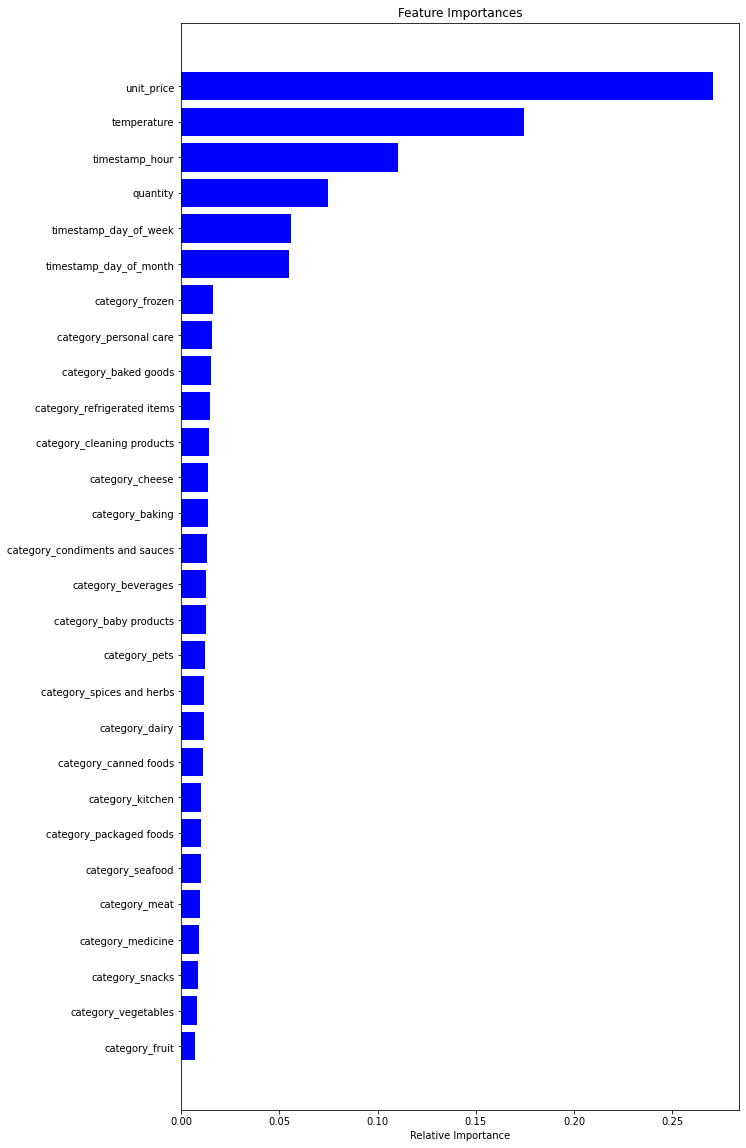

In [128]:
features = [i.split("__")[0] for i in X.columns]
importances = Rforest.steps[1][1].feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [143]:
from sklearn.ensemble import GradientBoostingRegressor

In [138]:
model = GradientBoostingRegressor()

In [140]:
model.fit(X_train, y_train.values.reshape(-1))
y_pred = model.predict(X_test)

In [141]:
r2_xg = r2_score(y_test.values.reshape(-1), y_pred)
r2_xg

-0.00789100440387136

In [142]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.22012839617738897